In [ ]:
#load the given data set for house price predication
#import the required libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

house_price = pd.read_csv(r"C:\Users\prith\Downloads\dataset\Housing.csv")
house_price["date"]=pd.to_datetime(house_price["date"])



In [3]:
#display first 5 rows
house_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


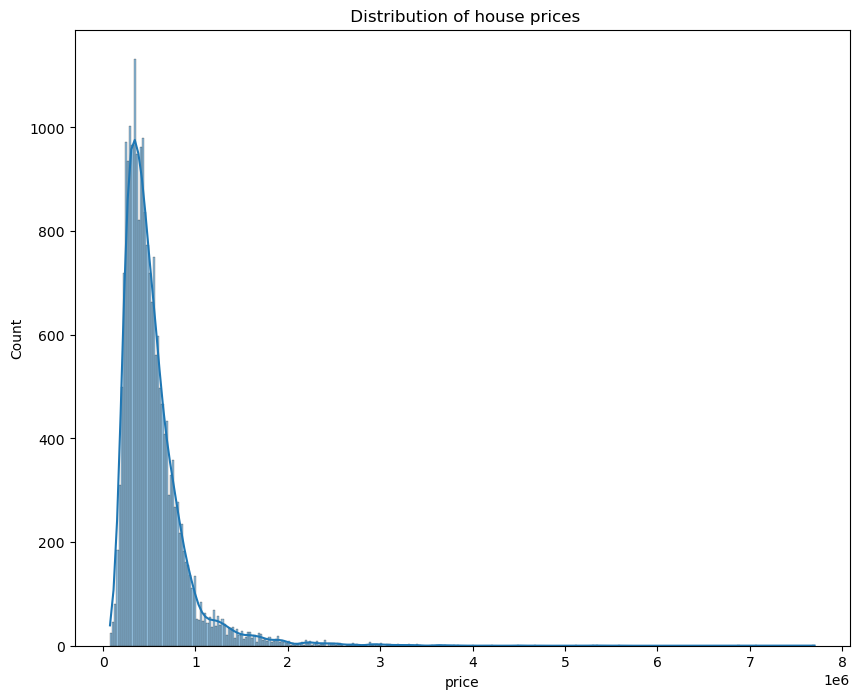

In [4]:
#visualize distribution of house prices
plt.figure(figsize=(10,8))
sns.histplot(house_price["price"],kde=True)
plt.title(" Distribution of house prices")
plt.show()

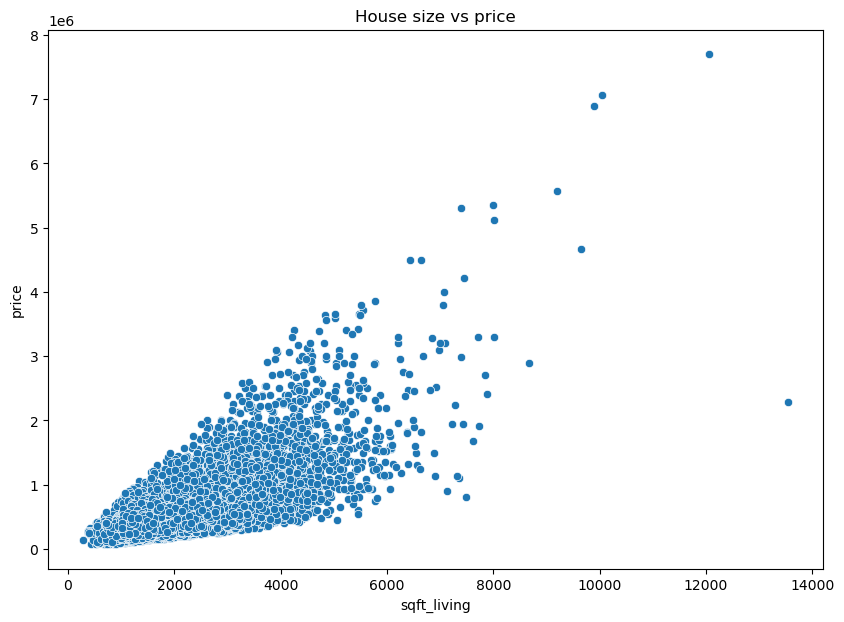

In [5]:
#visualize relationship between square footage of living space and price using scatterplot
plt.figure(figsize=(10,7))
sns.scatterplot(x="sqft_living",y="price",data=house_price)
plt.title("House size vs price")
plt.show()

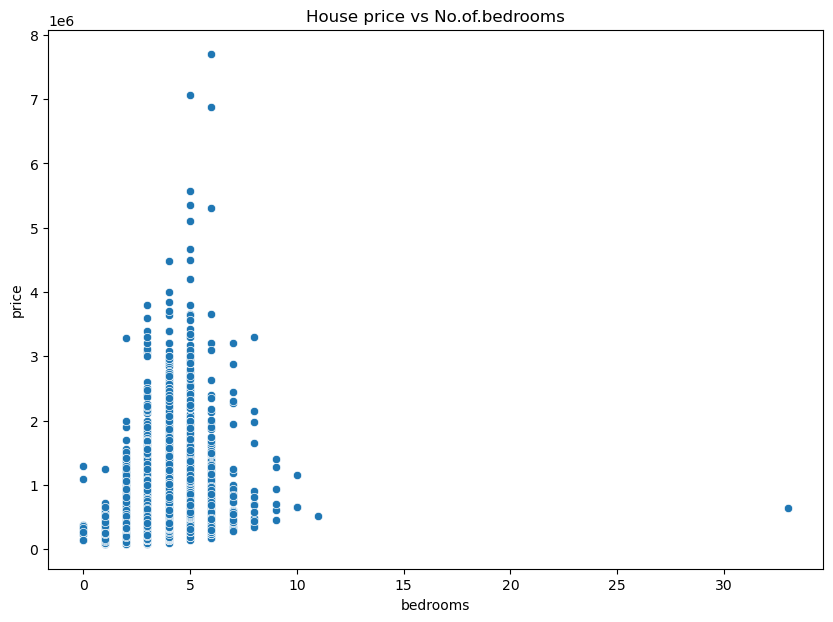

In [6]:
#visualize relationship between house price and number of bedrooms using scatterplot
plt.figure(figsize=(10,7))
sns.scatterplot(x="bedrooms", y="price",data=house_price)
plt.title("House price vs No.of.bedrooms")
plt.show()

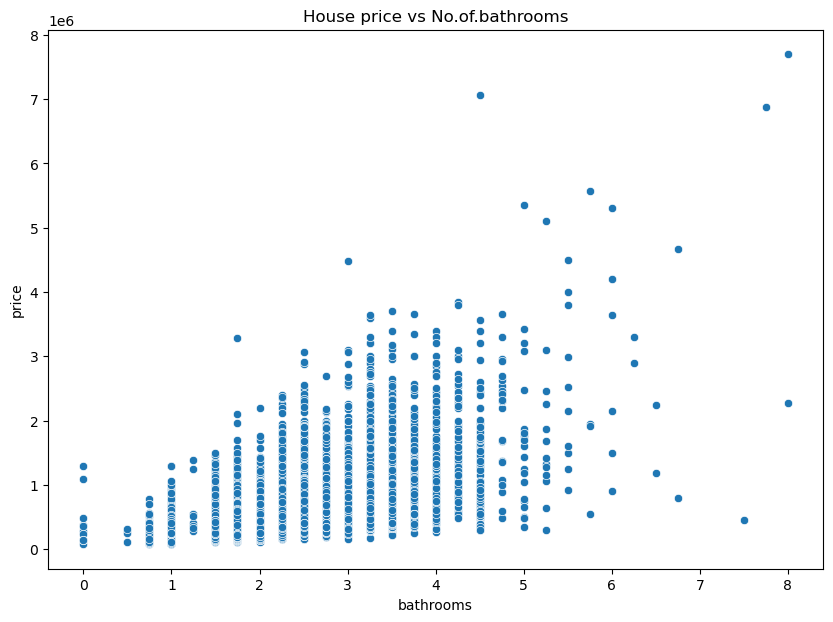

In [7]:
#visualize relationship between house price and number of bathrooms using scatterplot
plt.figure(figsize=(10,7))
sns.scatterplot(x="bathrooms", y="price",data=house_price)
plt.title("House price vs No.of.bathrooms")
plt.show()

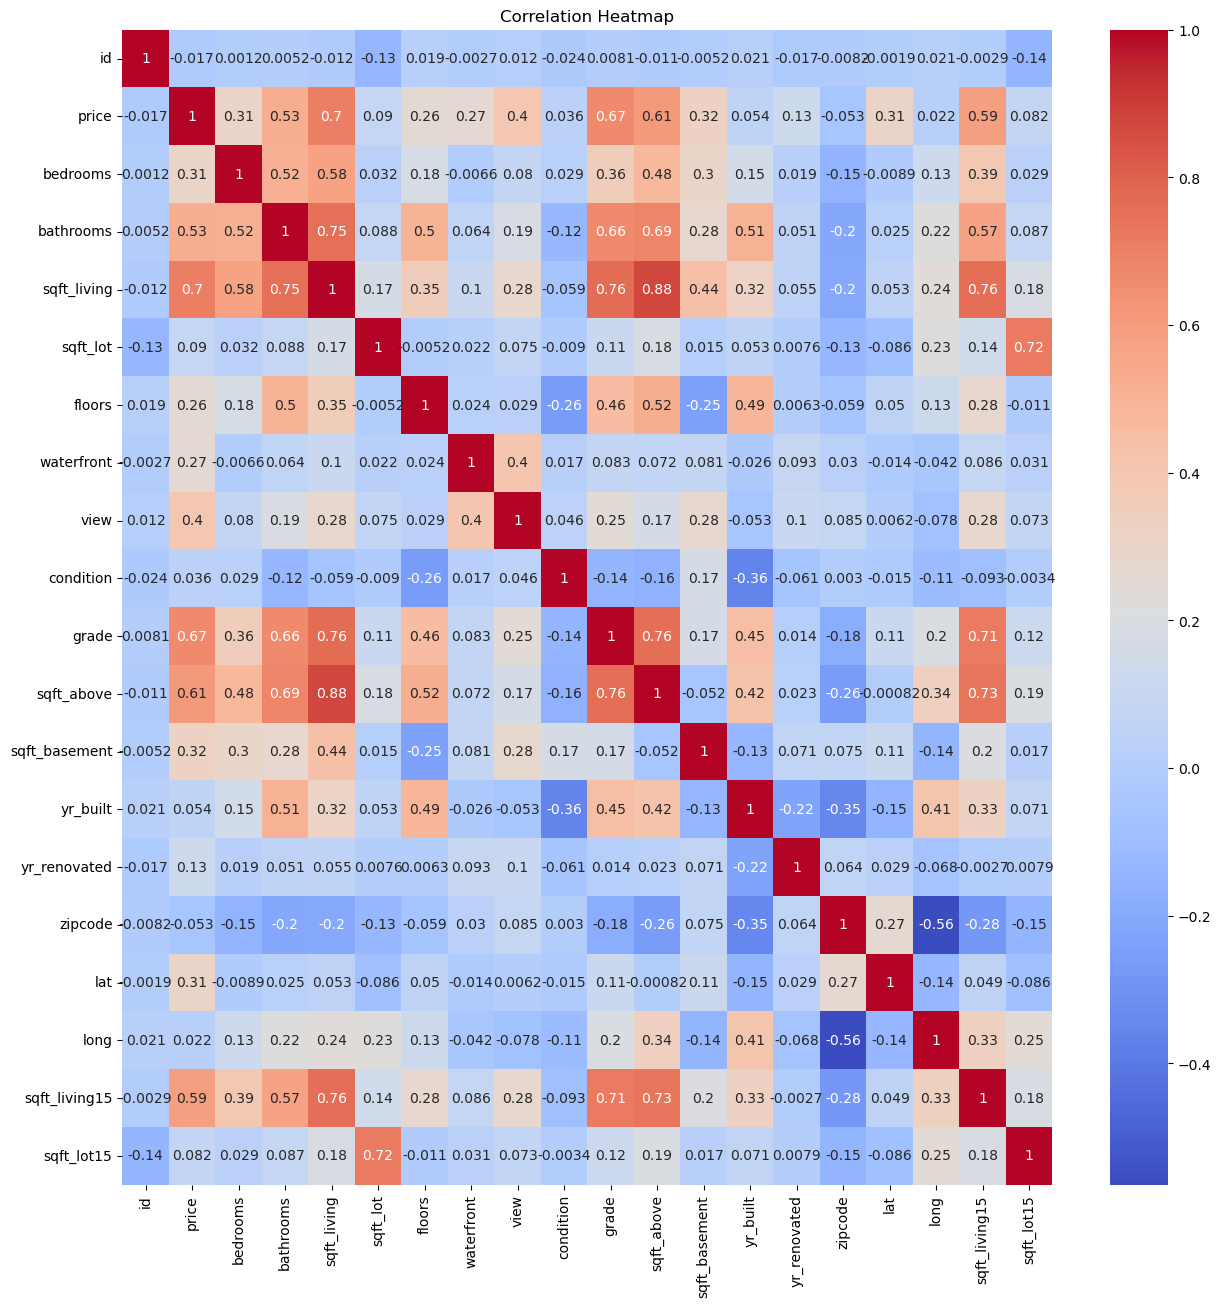

In [8]:
#visulaize the correlation between numerical features using a heatmap of corr matrix
numeric_cols = house_price.select_dtypes(include=[np.number])
plt.figure(figsize=(15,15))
sns.heatmap(numeric_cols.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

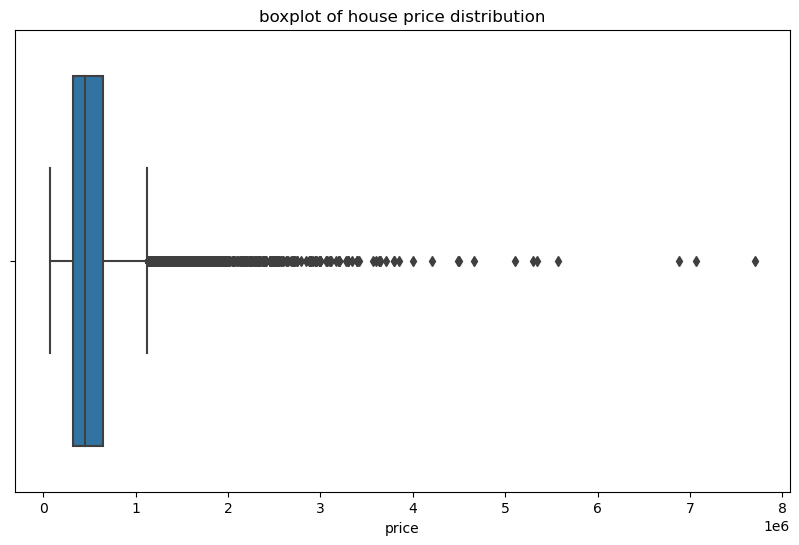

In [9]:
#visualize house price distribution using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=house_price["price"])
plt.title("boxplot of house price distribution")
plt.show()

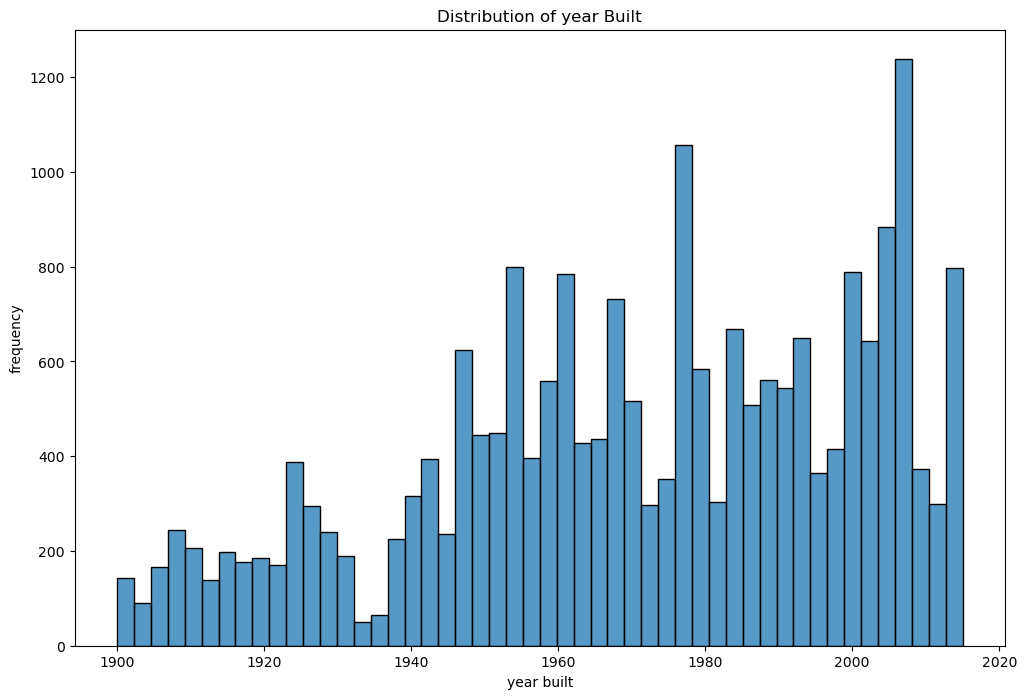

In [10]:
#visualize house built year distribution using histogram with 50 bins
plt.figure(figsize=(12,8))
sns.histplot(house_price["yr_built"],bins= 50,kde = False)
plt.title("Distribution of year Built")
plt.xlabel("year built")
plt.ylabel("frequency")
plt.show()

In [11]:
#create a copy of dataset with required columns
price_trend = house_price[["date","price"]].copy()
#set date as index
price_trend.set_index("date",inplace=True)
price_trend

,price
date,
2014-10-13,231300.0
2014-12-09,538000.0
2015-02-25,180000.0
2014-12-09,604000.0
2015-02-18,510000.0
...,...
2014-05-21,360000.0
2015-02-23,400000.0
2014-06-23,402101.0


In [12]:
#group by year and month and calculate mean price
price_trend = price_trend.resample("M").mean()
price_trend


,price
date,
2014-05-31,548080.276584
2014-06-30,558002.199541
2014-07-31,544788.764360
2014-08-31,536445.276804
2014-09-30,529253.821871
2014-10-31,539031.977103
2014-11-30,521961.009213
2014-12-31,524461.866757
2015-01-31,525870.889571


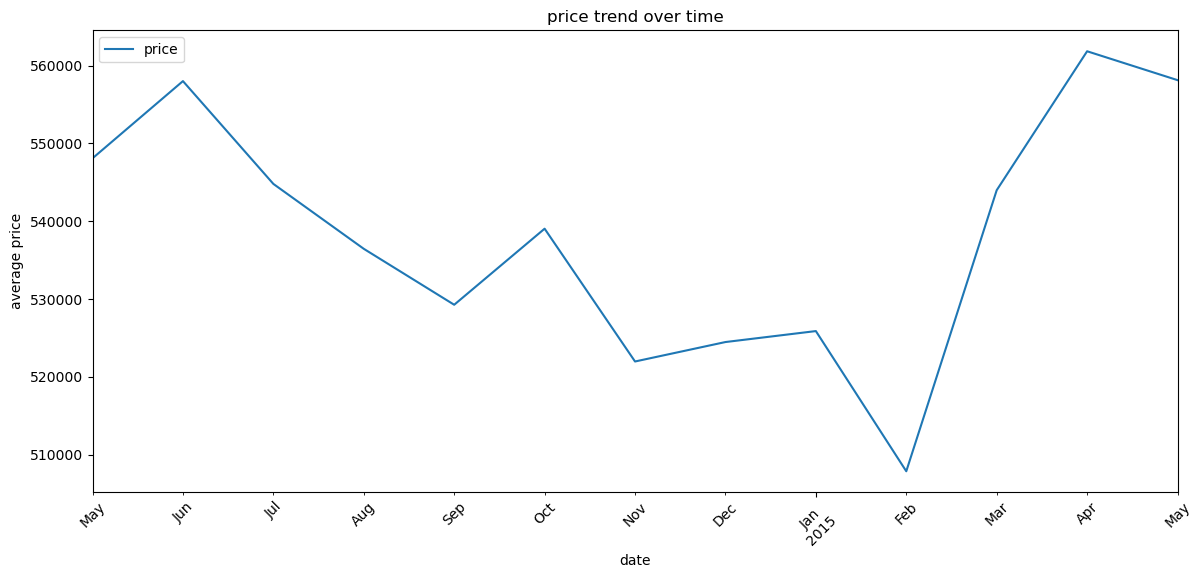

In [13]:
#plot the trend over time
price_trend.plot(kind = "line", figsize = (14,6), title ="price trend over time",ylabel = "average price", rot= 45)
plt.show()

In [14]:
#select the fetaures that needs to be correlated with house price
selected_features = ["bedrooms","bathrooms","sqft_living"]
#create a new data frame with the selected features
house_features = house_price[selected_features]
house_features

,bedrooms,bathrooms,sqft_living
0,2,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680
...,...,...,...
21608,3,2.50,1530
21609,4,2.50,2310
21610,2,0.75,1020
21611,3,2.50,1600


In [15]:
# split data into train, validation and test set
X_train, X_temp, Y_train, Y_temp = train_test_split(house_features, house_price["price"], test_size = 0.3, random_state=42)
X_val , X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.4, random_state = 42)
# create a linear regression model
model = LinearRegression()
# fit the model on train data
model.fit(X_train,Y_train)
# make predictions on validation data
y_pred_val = model.predict(X_val)

In [16]:
# evaluate model performance on valildation set
mse_val = mean_squared_error(Y_val,y_pred_val)
r2_val = r2_score(Y_val, y_pred_val)
print(f"Mean Squared error(validation) : {mse_val}")
print(f"R-Squared (validation):{r2_val}")

Mean Squared error(validation) : 67061868213.27714
R-Squared (validation):0.5069222863997823


In [17]:
# make predicitons on test data
y_pred_test = model.predict(X_test)

# evaluate model performance on test set
mse_test = mean_squared_error(Y_test,y_pred_test)
r2_test = r2_score(Y_test, y_pred_test)
print(f"Mean Squared error(validation) : {mse_test}")
print(f"R-Squared (validation):{r2_test}")


Mean Squared error(validation) : 80652759041.70369
R-Squared (validation):0.48596265896699675


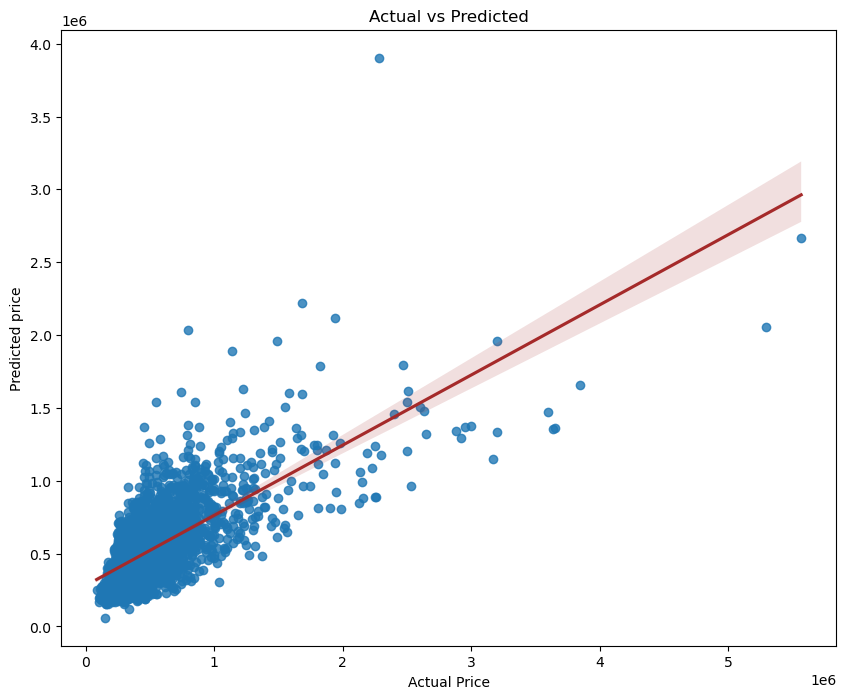

In [18]:
#visualize actual vs predicted value using scatter plot with regression line
plt.figure(figsize=(10,8))
sns.regplot(x=Y_test, y=y_pred_test, line_kws ={"color":"brown"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted")
plt.show()

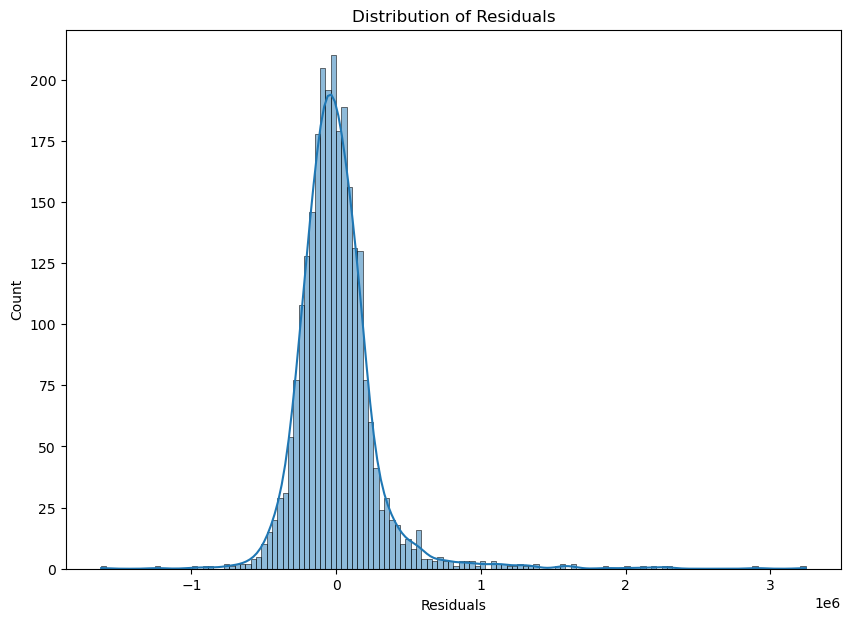

In [19]:
#calculate residuals
residuals = Y_test - y_pred_test

#visualize distribution of residuals using histogram and KDE plot
plt.figure(figsize=(10,7))
sns.histplot(residuals, kde = True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [22]:
# convert the date column to timestamp format for better processing
house_price["date"] = house_price["date"].apply(lambda x : x.timestamp())
#split data into train, validation and test
features = house_price.drop("price",axis = 1)
target = house_price["price"]
X_train , X_temp, Y_train, Y_temp = train_test_split(features, target, test_size=0.3, random_state = 42)
X_val, X_test, Y_val,Y_test = train_test_split(X_temp, Y_temp, test_size= 0.5, random_state = 42)

In [23]:
#scale features using StandardScaler
scaler = StandardScaler()

# fit scaler on train data and trasnform validation and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [26]:
#create feedforward neural network model using MLP Regressor
nm_model = MLPRegressor(hidden_layer_sizes = (100,50), activation = "relu", solver = "adam", max_iter = 3500, tol=0.0001, random_state = 42)
nm_model.fit(X_train_scaled, Y_train)
y_pred_val = nm_model.predict(X_val_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
# evaluate the model performance on the validation set
mse_val = mean_squared_error(Y_val, y_pred_val)
r2_val = r2_score(Y_val, y_pred_val)
print(f"Mean Squared Error : {mse_val}")
print(f"R-squared : {r2_val}")

Mean Squared Error : 15578765358.427969
R-squared : 0.8822294368634599


In [28]:
# make predictions on scaled data 
y_pred_test = nm_model.predict(X_test_scaled)
#evaluate performance on test set
mse_test = mean_squared_error(Y_test, y_pred_test)
r2_test = r2_score(Y_test, y_pred_test)
print(f"Mean Squared Error : {mse_test}")
print(f"R-squared : {r2_test}")

Mean Squared Error : 16147425580.308945
R-squared : 0.8967626198974751


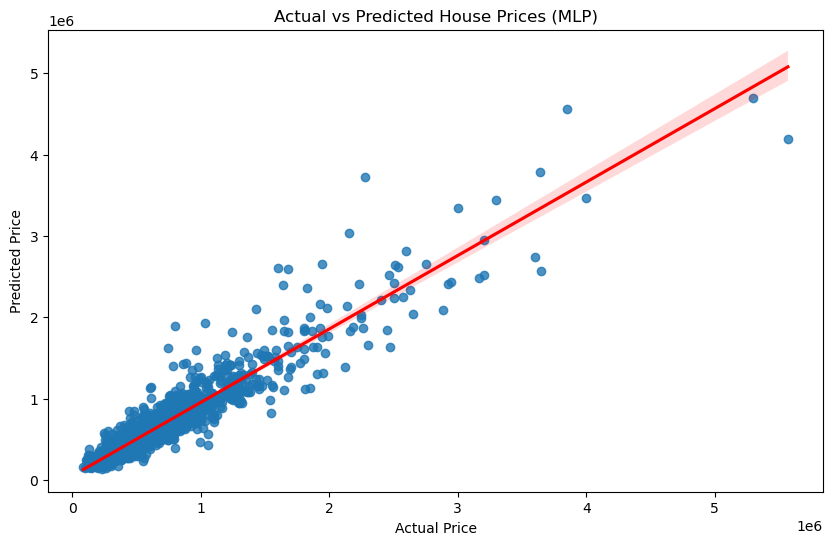

In [29]:
# visualize the actual vs predicted house prices using a scatter plot with a regression line
plt.figure(figsize = (10, 6))
sns.regplot(x = Y_test, y = y_pred_test, line_kws = {"color" : "red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (MLP)")
plt.show()